In [1]:
import pandas as pd
df = pd.read_excel ('data-bearing-simple.xlsx', index_col =0)
display ( df ) # visualiza dataframe
X = df.values [: , 0:4] # valores a b segun corresponda
y = df.values [: , 4] # valor c segun corresponda

display(X)
display(y)

,rps,max,rms,kurt,label
0,15.024038,0.311521,0.029794,7.642549,1
1,15.024038,0.216155,0.022242,6.541628,1
2,15.024038,0.255288,0.028959,9.691690,1
3,15.988251,0.323688,0.030494,8.147744,1
4,16.276042,0.210893,0.024360,6.408226,1
...,...,...,...,...,...
1795,15.024038,0.032001,0.008162,0.545736,2
1796,15.024038,0.030685,0.007978,0.637705,2
1797,15.024038,0.034960,0.008167,0.576496,2
1798,14.551837,0.031014,0.008032,0.468465,2


array([[1.50240385e+01, 3.11520735e-01, 2.97939555e-02, 7.64254855e+00],
       [1.50240385e+01, 2.16155053e-01, 2.22417637e-02, 6.54162790e+00],
       [1.50240385e+01, 2.55287866e-01, 2.89586583e-02, 9.69169014e+00],
       ...,
       [1.50240385e+01, 3.49602789e-02, 8.16676767e-03, 5.76496280e-01],
       [1.45518373e+01, 3.10141135e-02, 8.03191236e-03, 4.68464805e-01],
       [1.39508929e+01, 3.89064443e-02, 7.80698809e-03, 7.01162602e-01]])

array([1., 1., 1., ..., 2., 2., 2.])

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [3]:
#entrenamiento del modelo 2
logregre = LogisticRegression()
logregre.fit(X_train, y_train)
y_train_predict = logregre.predict(X_train)
print('la exactitud de entrenamiento es = ', accuracy_score(y_train, y_train_predict))

#test del modelo
y_test_predict = logregre.predict(X_test)
print('la exactitud de test es = ', accuracy_score(y_test, y_test_predict))

la exactitud de entrenamiento es =  0.7763888888888889
la exactitud de test es =  0.7194444444444444


In [4]:
## EJERCICIO 3

X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=17)
solvers = ['lbfgs', 'sag', 'newton-cg']
Cs = [0.01, 1, 100]

for s in range(3):
    for c in range(3):
        logregre_2 = LogisticRegression(max_iter = 10000, solver=solvers[s], C=Cs[c])
        logregre_2.fit(X_train_2, y_train_2)
        resultado = accuracy_score(logregre_2.predict(X_val), y_val)
        print(solvers[s], Cs[c], resultado)
        
        
#entrenamiento del modelo 3
logregre = LogisticRegression(max_iter = 10000, solver='lbfgs', C=100)
logregre.fit(X_train, y_train)
y_train_predict = logregre.predict(X_train)
print('la exactitud de entrenamiento es = ', accuracy_score(y_train, y_train_predict))

#test del modelo
y_test_predict = logregre.predict(X_test)
print('la exactitud de test es = ', accuracy_score(y_test, y_test_predict))

lbfgs 0.01 0.6055555555555555
lbfgs 1 0.7416666666666667
lbfgs 100 0.925
sag 0.01 0.6055555555555555
sag 1 0.7444444444444445
sag 100 0.9
newton-cg 0.01 0.6055555555555555
newton-cg 1 0.7416666666666667
newton-cg 100 0.925
la exactitud de entrenamiento es =  0.9291666666666667
la exactitud de test es =  0.9333333333333333


In [5]:
## EJERCICIO 4
import numpy as np

proba = logregre.predict_proba(X_test)

prediccion = logregre.predict(X_test)
indices_0 = list()
indices_1 = list()
indices_2 = list()
for i in range(len(prediccion)):
    v = prediccion[i]
    if v == 0:
        indices_0.append(i)
    elif v == 1:
        indices_1.append(i)
    elif v == 2:
        indices_2.append(i)

porcentajes_0 = list()
porcentajes_1 = list()
porcentajes_2 = list()

for k in range(len(indices_0)):
    i = indices_0[k]
    porcentajes_0.append(proba[i,0])
    
for k in range(len(indices_1)):
    i = indices_1[k]
    porcentajes_1.append(proba[i,1])
    
for k in range(len(indices_2)):
    i = indices_2[k]
    porcentajes_2.append(proba[i,2])
    
print("Resultado 0", "Confianza: ", np.mean(porcentajes_0), "Desviacíon: ", np.std(porcentajes_0))
print("Resultado 1", "Confianza: ", np.mean(porcentajes_1), "Desviacíon: ", np.std(porcentajes_1))
print("Resultado 2", "Confianza: ", np.mean(porcentajes_2), "Desviacíon: ", np.std(porcentajes_2))

Resultado 0 Confianza:  0.8364696573075346 Desviacíon:  0.13455683251589604
Resultado 1 Confianza:  0.9915486455011597 Desviacíon:  0.021038527035659636
Resultado 2 Confianza:  0.8097438915492285 Desviacíon:  0.12787471282614868


In [6]:
## ejercicio 5
df2 = df.drop(['rps'],axis=1)
X_2 = df2.values [: , 0:3] # valores a b segun corresponda
y_2 = df2.values [: , 3] # valor c segun corresponda
display(df2)
display(X_2)
display(y_2)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_2, y_2, test_size=0.2, random_state=17)

#entrenamiento del modelo 4
logregre3 = LogisticRegression(max_iter = 10000, solver='lbfgs', C=100)
logregre3.fit(X_train_3, y_train_3)
y_train_predict_3 = logregre3.predict(X_train_3)
print('la exactitud de entrenamiento es = ', accuracy_score(y_train_3, y_train_predict_3))

#test del modelo 4
y_test_predict_3 = logregre3.predict(X_test_3)
print('la exactitud de test es = ', accuracy_score(y_test_3, y_test_predict_3))

,max,rms,kurt,label
0,0.311521,0.029794,7.642549,1
1,0.216155,0.022242,6.541628,1
2,0.255288,0.028959,9.691690,1
3,0.323688,0.030494,8.147744,1
4,0.210893,0.024360,6.408226,1
...,...,...,...,...
1795,0.032001,0.008162,0.545736,2
1796,0.030685,0.007978,0.637705,2
1797,0.034960,0.008167,0.576496,2
1798,0.031014,0.008032,0.468465,2


array([[3.11520735e-01, 2.97939555e-02, 7.64254855e+00],
       [2.16155053e-01, 2.22417637e-02, 6.54162790e+00],
       [2.55287866e-01, 2.89586583e-02, 9.69169014e+00],
       ...,
       [3.49602789e-02, 8.16676767e-03, 5.76496280e-01],
       [3.10141135e-02, 8.03191236e-03, 4.68464805e-01],
       [3.89064443e-02, 7.80698809e-03, 7.01162602e-01]])

array([1., 1., 1., ..., 2., 2., 2.])

la exactitud de entrenamiento es =  0.8555555555555555
la exactitud de test es =  0.8555555555555555


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


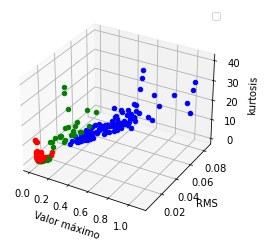

In [7]:
## EJERCICIO 6
import matplotlib.pyplot as plt

## DIAGRAMA DE DISPERSIÓN DATOS REALES
fig = plt.figure()
ax = fig.add_subplot(projection ='3d')

for i in range(len(X_test_3)):
    color = "red"
    if y_test_3[i] == 1:
        color = "blue"
    elif y_test_3[i] == 2:
        color = "green"
    ax.scatter(X_test_3[i,0], X_test_3[i,1], X_test_3[i,2], color=color)
    
plt.xlabel("Valor máximo")
plt.ylabel("RMS")
ax.set_zlabel("kurtosis")

ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


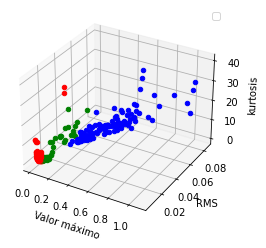

In [8]:
## DIAGRAMA DE DISPERSIÓN PREDICCÍON

fig = plt.figure () # inicia figura vacia
ax = fig.add_subplot ( projection ='3d') # agrega grafico 3d aun vacio a figura

for i in range(len(X_test_3)):
    color = "red"
    if y_test_predict_3[i] == 1:
        color = "blue"
    elif y_test_predict_3[i] == 2:
        color = "green"
    ax.scatter(X_test_3[i,0], X_test_3[i,1], X_test_3[i,2], color=color)
    
plt.xlabel("Valor máximo")
plt.ylabel("RMS")
ax.set_zlabel("kurtosis")

ax.legend()
plt.show()